# Zillow CSV ETL process

This code serves as a blueprint for the csv ETL process. You will need to update certain field and column names in this report according to the csv file name, the metric and report under consideration, and so on. There are annotations provided throughout to guide you through the code.

In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Declare Variables

In [2]:
#Add inputs here, and clean csv should auto-populate
start_date = '2018-01-06'
end_date = '2023-11-04'
raw_csv_path = 'Resources_Raw/raw_mean_listings_price_cut_perc_week_all.csv'
clean_csv_path = 'Resources_Clean/clean_mean_listings_price_cut_perc_week_all.csv'
metric_name = 'Mean Listings Price Cut (%)'

In [3]:
initial_csv = Path(raw_csv_path)
initial_df = pd.read_csv(initial_csv)
initial_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-06,2018-01-13,2018-01-20,2018-01-27,2018-02-03,...,2023-09-02,2023-09-09,2023-09-16,2023-09-23,2023-09-30,2023-10-07,2023-10-14,2023-10-21,2023-10-28,2023-11-04
0,102001,0,United States,country,NaN,0.036326,0.037157,0.036761,0.037030,0.036412,...,0.036183,0.035447,0.035561,0.035530,0.035619,0.035387,0.035562,0.035376,0.035121,0.035043
1,394913,1,"New York, NY",msa,NY,0.041599,0.041929,0.042541,0.043552,0.043828,...,0.044334,0.045283,0.043963,0.042732,0.045417,0.044707,0.045375,0.043603,0.043790,0.043671
2,753899,2,"Los Angeles, CA",msa,CA,0.031608,0.031473,0.031882,0.033334,0.031590,...,0.035844,0.037741,0.037082,0.037546,0.038734,0.035399,0.036803,0.037765,0.036738,0.037324
3,394463,3,"Chicago, IL",msa,IL,0.031203,0.030694,0.030531,0.031077,0.031485,...,0.035994,0.034955,0.034684,0.033831,0.034148,0.033104,0.033802,0.032108,0.032822,0.033333
4,394514,4,"Dallas, TX",msa,TX,0.026746,0.028362,0.026108,0.027396,0.026635,...,0.025945,0.026410,0.027018,0.027127,0.027400,0.026660,0.026481,0.026555,0.026616,0.026578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,753920,569,"Sonora, CA",msa,CA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.041458,0.032459,0.047325,0.035605,0.045600,0.039029
354,394503,592,"Corsicana, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030597,0.033494
355,394745,744,"Kill Devil Hills, NC",msa,NC,NaN,NaN,NaN,NaN,NaN,...,0.037202,0.034209,0.029874,0.024788,0.034213,0.039044,0.025068,0.038274,0.034037,0.032140
356,786252,761,"Bonham, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056267,0.042835


# Remove Nulls from DataFrame

In [4]:
#Checks if any Date column has a null for a given RegionName
date_range_columns = initial_df.loc[:, start_date : end_date] 
null_check = date_range_columns.isna().any(axis=1)

#Reverse filter based on null check for rows without null
null_check_df = initial_df.loc[~null_check, :]

#Preview
null_check_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-06,2018-01-13,2018-01-20,2018-01-27,2018-02-03,...,2023-09-02,2023-09-09,2023-09-16,2023-09-23,2023-09-30,2023-10-07,2023-10-14,2023-10-21,2023-10-28,2023-11-04
2,753899,2,"Los Angeles, CA",msa,CA,0.031608,0.031473,0.031882,0.033334,0.031590,...,0.035844,0.037741,0.037082,0.037546,0.038734,0.035399,0.036803,0.037765,0.036738,0.037324
4,394514,4,"Dallas, TX",msa,TX,0.026746,0.028362,0.026108,0.027396,0.026635,...,0.025945,0.026410,0.027018,0.027127,0.027400,0.026660,0.026481,0.026555,0.026616,0.026578
5,394692,5,"Houston, TX",msa,TX,0.033959,0.036084,0.034681,0.034365,0.034456,...,0.031295,0.031563,0.032160,0.032043,0.031249,0.030893,0.030786,0.032663,0.032457,0.031954
6,395209,6,"Washington, DC",msa,VA,0.031077,0.030407,0.028477,0.032459,0.030226,...,0.033706,0.030307,0.029705,0.030776,0.028932,0.030368,0.030618,0.031181,0.031427,0.029992
7,394974,7,"Philadelphia, PA",msa,PA,0.038530,0.039494,0.039937,0.040581,0.037420,...,0.036813,0.037743,0.038274,0.038008,0.037157,0.038551,0.037654,0.038862,0.035178,0.036602
8,394856,8,"Miami, FL",msa,FL,0.037481,0.038428,0.038394,0.037038,0.035913,...,0.035473,0.036121,0.034210,0.035460,0.034091,0.035605,0.034790,0.034464,0.034620,0.033805
10,394404,10,"Boston, MA",msa,MA,0.035670,0.035689,0.034860,0.033156,0.036753,...,0.040596,0.039042,0.037169,0.040277,0.038210,0.039083,0.037400,0.040170,0.038664,0.038109
13,395025,13,"Riverside, CA",msa,CA,0.030839,0.031737,0.030674,0.031548,0.030739,...,0.036874,0.033640,0.032721,0.032502,0.032807,0.034982,0.035256,0.033387,0.033089,0.033107
16,394865,16,"Minneapolis, MN",msa,MN,0.031506,0.030150,0.029611,0.034384,0.030551,...,0.035320,0.033399,0.034765,0.033540,0.035201,0.034815,0.033957,0.033872,0.034482,0.033550
17,395056,17,"San Diego, CA",msa,CA,0.026898,0.030444,0.029165,0.028289,0.026604,...,0.033268,0.035854,0.034248,0.036555,0.031121,0.035115,0.031591,0.032877,0.033909,0.032151


# Condense Date Columns to Single Column

In this section, we condense the multiple date columns into a single 'date' column. This allows for easier data visualization moving forward.

In [5]:
condensed_rough_df = pd.DataFrame(null_check_df)

new_rows = []

#For loop to iterate through each RegionName
for _, row in condensed_rough_df.iterrows():
    region_ID = row['RegionID']
    size_rank = row['SizeRank']
    region_name = row['RegionName']
    region_type = row['RegionType']
    state_name = row['StateName']
    
    #For loop to iterate through each Date Column within a given RegionName
    for date_column in condensed_rough_df.columns[5:]:
        date = pd.to_datetime(date_column)
        value = row[date_column]
        
        #Add 'Date' and 'value' values for a given Date and Region into new_rows list.
        new_rows.append([region_ID,size_rank,region_name,region_type,state_name, date, value])

#New df based on new_rows 'list'
condensed_df = pd.DataFrame(new_rows, columns=
                             ['Region ID',
                              'Size Rank',
                              'Region Name',
                              'Region Type',
                              'State Name',
                              'Date',
                              metric_name])


#create moving average column for each Region.
window_size = 3 #time period (weeks)
condensed_df[f'{metric_name} Rolling Avg'] = condensed_df.groupby('Region Name')[metric_name].rolling(window=window_size).mean().reset_index(level=0, drop=True)

#preview df
condensed_df

,Region ID,Size Rank,Region Name,Region Type,State Name,Date,Mean Listings Price Cut (%),Mean Listings Price Cut (%) Rolling Avg
0,753899,2,"Los Angeles, CA",msa,CA,2018-01-06,0.031608,NaN
1,753899,2,"Los Angeles, CA",msa,CA,2018-01-13,0.031473,NaN
2,753899,2,"Los Angeles, CA",msa,CA,2018-01-20,0.031882,0.031654
3,753899,2,"Los Angeles, CA",msa,CA,2018-01-27,0.033334,0.032229
4,753899,2,"Los Angeles, CA",msa,CA,2018-02-03,0.031590,0.032268
...,...,...,...,...,...,...,...,...
12805,753875,176,"Crestview, FL",msa,FL,2023-10-07,0.027787,0.028195
12806,753875,176,"Crestview, FL",msa,FL,2023-10-14,0.029682,0.029576
12807,753875,176,"Crestview, FL",msa,FL,2023-10-21,0.028683,0.028717
12808,753875,176,"Crestview, FL",msa,FL,2023-10-28,0.031270,0.029878


# Analysis Testing

Section I created to test initial clean dataframe. Use only as a referance for chart output.

In [6]:
MSA_filter = ['United States','New York, NY','Los Angeles, CA','Chicago, IL','Dallas, TX']

short_table = condensed_df['Region Name'].isin(MSA_filter)
filtered_df = condensed_df[short_table]

filtered_df

,Region ID,Size Rank,Region Name,Region Type,State Name,Date,Mean Listings Price Cut (%),Mean Listings Price Cut (%) Rolling Avg
0,753899,2,"Los Angeles, CA",msa,CA,2018-01-06,0.031608,NaN
1,753899,2,"Los Angeles, CA",msa,CA,2018-01-13,0.031473,NaN
2,753899,2,"Los Angeles, CA",msa,CA,2018-01-20,0.031882,0.031654
3,753899,2,"Los Angeles, CA",msa,CA,2018-01-27,0.033334,0.032229
4,753899,2,"Los Angeles, CA",msa,CA,2018-02-03,0.031590,0.032268
...,...,...,...,...,...,...,...,...
605,394514,4,"Dallas, TX",msa,TX,2023-10-07,0.026660,0.027062
606,394514,4,"Dallas, TX",msa,TX,2023-10-14,0.026481,0.026847
607,394514,4,"Dallas, TX",msa,TX,2023-10-21,0.026555,0.026565
608,394514,4,"Dallas, TX",msa,TX,2023-10-28,0.026616,0.026551


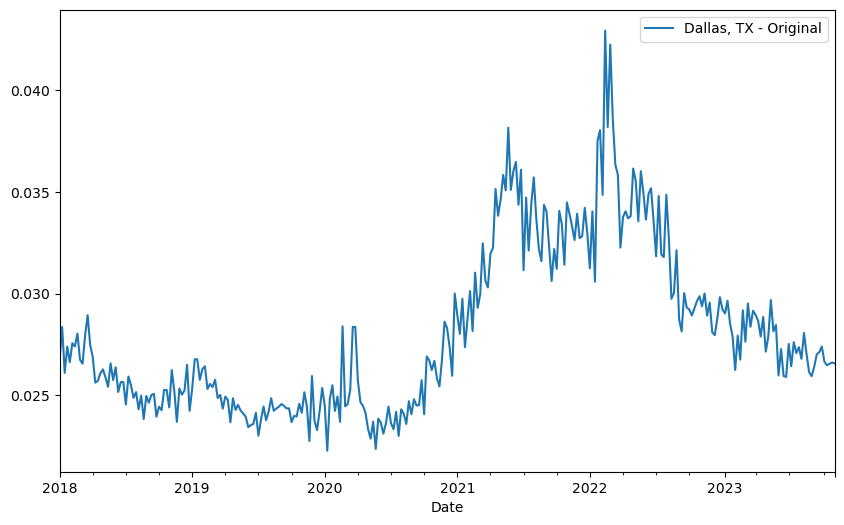

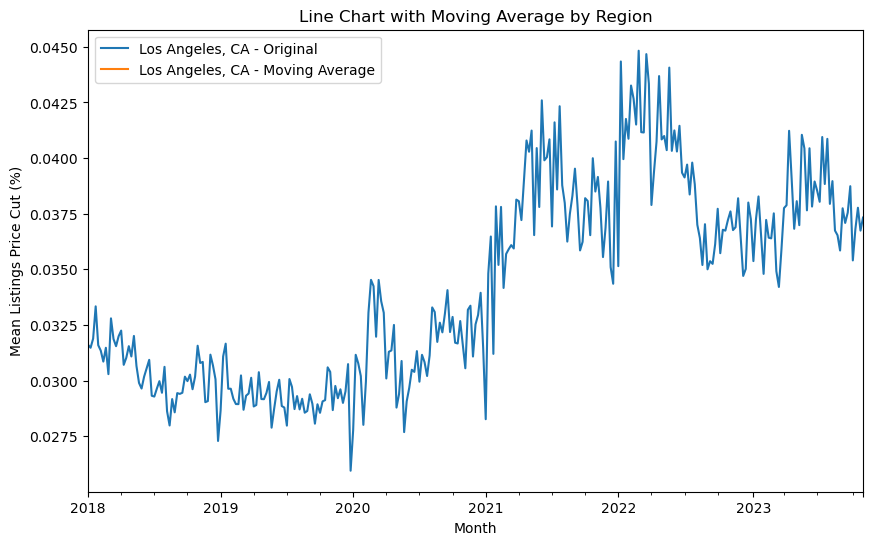

In [7]:
window_size = 3

for region, data in filtered_df.groupby('Region Name'):
    data.plot(kind='line', x='Date', y=metric_name, label=f'{region} - Original', figsize=(10, 6))
    plt.plot(data['Date'], data[f'{metric_name} Rolling Avg'], label=f'{region} - Moving Average')

    
plt.title('Line Chart with Moving Average by Region')
plt.xlabel('Month')
plt.ylabel(metric_name)
plt.legend()
plt.show()

# Generate Clean CSV File

In [8]:
#IMPORTANT -- CHANGE CSV OUTPUT NAME RELEVANT REPORT
condensed_df.to_csv(clean_csv_path, index=False)